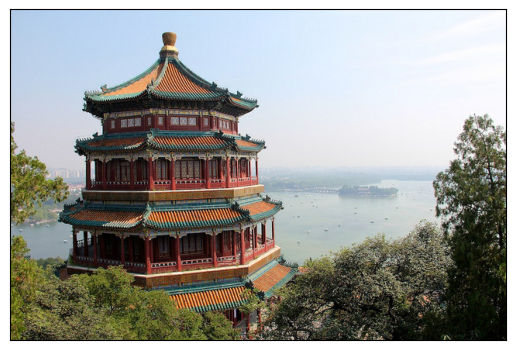

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
plt.show()

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already loaded the "china.jpg" image into the 'china' variable

# Get the shape of the 'china' array to see its dimensions
# The shape of the 'china' array will be in the format (height, width, channels)
china.shape

# Output:
# (427, 640, 3)

#To flatten this 3D array into a 2D array, we can use the reshape(-1, 3) syntax, where -1 indicates 
# that we want numpy to infer the number of rows (i.e., the number of pixels). 
# Since we want to keep the number of columns as 3 (representing the three channels), we use 3 as the second dimension.

#By specifying reshape(-1, 3), numpy automatically calculates the number of rows required to accommodate all elements in 
# the original 3D array. The result is a 2D array with 819,840 rows (pixels) and 3 columns (channels).

# Flatten the 3D array into a 2D array
reshaped_data = china.reshape(-1, 3)

# Check the shape of the flattened array to verify it has rows equal to 427*640 and 3 columns
reshaped_data.shape

# Output:
# (273280, 3)

# Now, we'll use scikit-learn's MinMaxScaler to normalize the values in each column (channel) to the range [0, 1].
# MinMaxScaler works by transforming each feature individually to the [0, 1] range.

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the flattened data using the MinMaxScaler
normalized_data = scaler.fit_transform(reshaped_data)

# Check the shape of the normalized data to verify it's still (273280, 3)
normalized_data.shape

# Output:
# (273280, 3)



(273280, 3)

In [3]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);


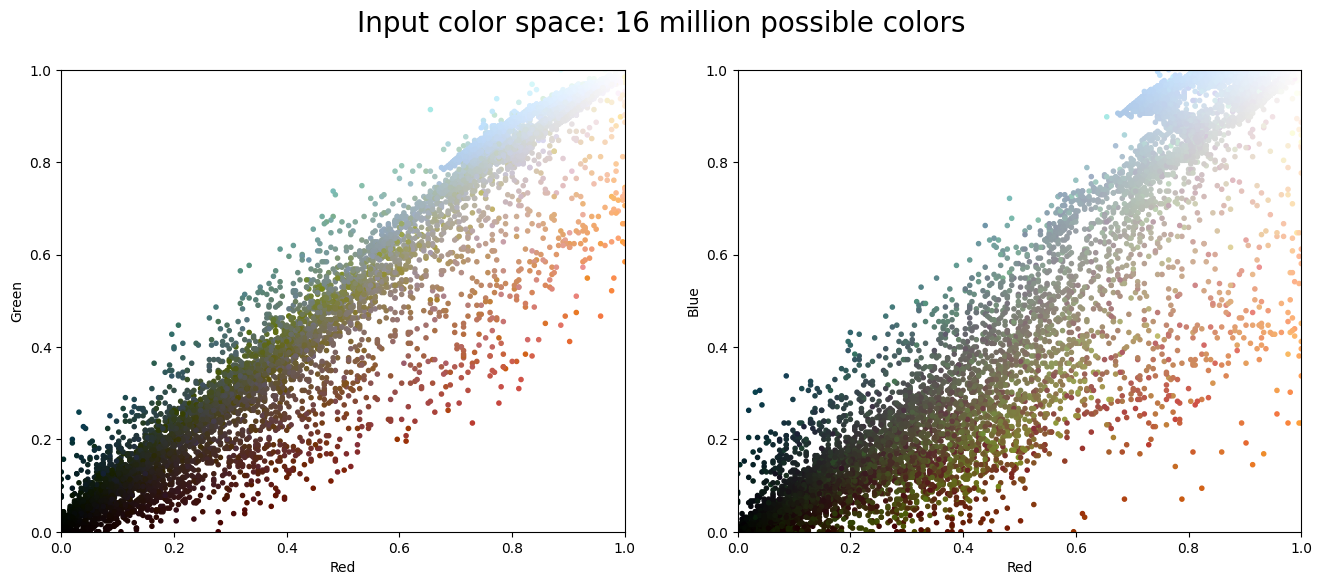

In [4]:
plot_pixels(normalized_data, title='Input color space: 16 million possible colors')

In [10]:
import warnings; warnings.simplefilter('ignore') #fixes warnings

from sklearn.cluster import MiniBatchKMeans     # MiniBatchKMeans

# Determine the number of unique colors in the image
num_unique_colors = len(np.unique(normalized_data, axis=0))
print("Number of unique colors: {0}".format(num_unique_colors))

kmeans = MiniBatchKMeans(n_clusters=num_unique_colors, random_state=0, batch_size=100, max_iter=10).fit(normalized_data)

new_colors = kmeans.cluster_centers_[kmeans.predict(normalized_data)]   # Predict colors

plot_pixels(normalized_data, colors=new_colors, title='Reduced color space') # Plot colors


Number of unique colors: 96615


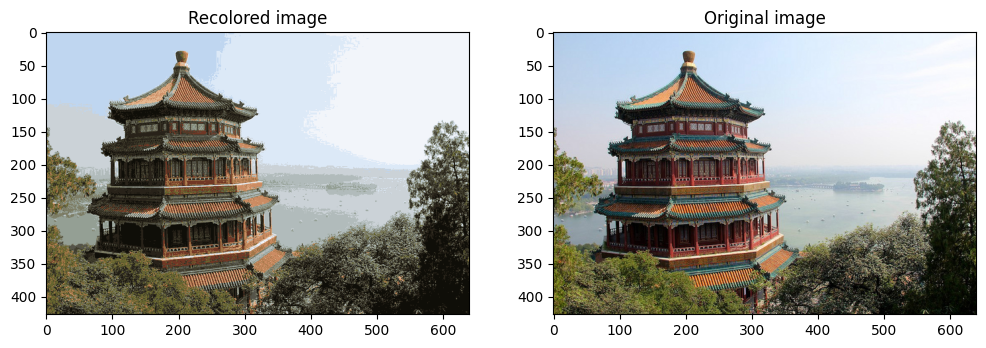

In [9]:
china_recolored = new_colors.reshape(china.shape)       # Reshape to match the original image dimensions

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show the recolored image in the first subplot
ax[0].imshow(china_recolored)
ax[0].set_title(f'Recolored image ({num_unique_colors} colors)')

# Show the original image in the second subplot
ax[1].imshow(china)
ax[1].set_title('Original image')

# Display the plot
plt.show()